## Ref: A. Bazavov et al. (HotQCD), Phys. Rev. D90, 094503 (2014), arXiv:1407.6387 [hep-lat].

### $P_0/T^4$

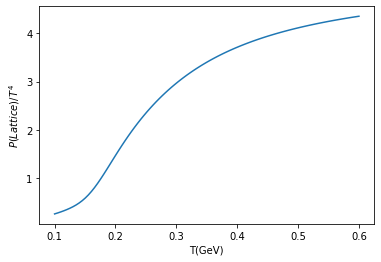

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.special import kv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import besselk
from sympy import lambdify
from sympy import exp,besselk,expand_func 

T=Symbol('T')
Tc=0.160
tbar=T/Tc
ct=3.8706
an=-8.7704
bn=3.9200
cn=0.0000
dn=0.3419
t0=0.9761
ad=-1.2600
bd=0.8425
cd=0.0000
dd=-0.0475
pid=95.*(np.pi)**2/180.
def tanh(a):
  return ((exp(a)-exp(-a))/(exp(a)+exp(-a)))
P0=T**4*(0.5+0.5*tanh(ct*(tbar-t0)))*(pid+an/tbar+bn/tbar**2+cn/tbar**3+dn/tbar**4)/(1+ad/tbar+bd/tbar**2+cd/tbar**3+dd/tbar**4)
functl=lambdify(((T),),P0, 'numpy')
xn = np.linspace(0.1, 0.6, num=100, endpoint=True)
plt.xlabel('T(GeV)')
plt.ylabel('$P(Lattice)/T^4$')
plt.plot(xn,functl((xn))/xn**4)


##Ref: A.Monnai, B. Schenke and C. Shen,
## "QCD equation of state at finite densities for nuclear collisions,"[arXiv:2002.02661 [nucl-th]].


# Lattice Equation State at Non Stefan Boltzman Limit at $\mu_S=\mu_Q=0$,

\begin{eqnarray}
\frac{P}{T^4} &=& \frac{P_0}{T^4} + \sum_{l=2,4,6} \frac{\chi^{B}_{l}}{l!} \bigg( \frac{\mu_B}{T} \bigg)^{l}+\sum_{l,m=\{1,3\},1} \frac{\chi^{B}_{l}}{l!} \frac{\chi^{Q}_{m}}{m!}\bigg( \frac{\mu_B}{T} \bigg)^{l}\bigg( \frac{\mu_Q}{T} \bigg)^{m}+\sum_{l,n=\{1,3\},1} \frac{\chi^{B}_{l}}{l!} \frac{\chi^{S}_{n}}{n!}\bigg( \frac{\mu_B}{T} \bigg)^{l}\bigg( \frac{\mu_S}{T} \bigg)^{n}, 
\end{eqnarray} 

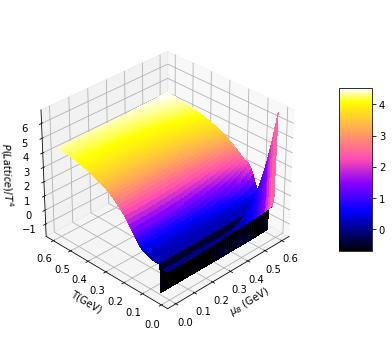

In [0]:

mub=Symbol('mub')
muq=Symbol('muq')
mus=Symbol('mus')
T=Symbol('T')

df1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/check_eosmub/table1.dat')
df2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/check_eosmub/table2.dat')
df3=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/check_eosmub/table3.dat')
df4=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/check_eosmub/table4.dat')
P=0
def tanh(a):
  return ((exp(a)-exp(-a))/(exp(a)+exp(-a)))
def g1p(i):
  return (1./2.)*(1+tanh((T-df2[' T_1 (GeV)'][i])/df2[' Delta T_1 (GeV) '][i]))
def g2p(i):
  return (1./2.)*(1+tanh((T-df2[' T_2 (GeV) '][i])/df2[' Delta T_2 (GeV) '][i]))
def g2m(i):
  return (1./2.)*(1-tanh((T-df2[' T_2 (GeV) '][i])/df2[' Delta T_2 (GeV) '][i]))
def g3p(i):
  return (1./2.)*(1+tanh((T-df1[' T_3 (GeV) '][i])/df1[' Delta T_3 (GeV) '][i]))
def g3m(i):
  return (1./2.)*(1-tanh((T-df1[' T_3 (GeV) '][i])/df1[' Delta T_3 (GeV) '][i]))
def g4p(i):
  return (1./2.)*(1+tanh((T-df3[' T_4 (GeV)'][i])/df3[' Delta T_4 (GeV) '][i]))
def g5p(i):
  return (1./2.)*(1+tanh((T-df3[' T_5 (GeV)  '][i])/df4[' Delta T_5 (GeV) '][i]))
def g5m(i):
  return (1./2.)*(1-tanh((T-df3[' T_5 (GeV)  '][i])/df4[' Delta T_5 (GeV) '][i]))
def g6p(i):
  return (1./2.)*(1+tanh((T-df4[' T_6 (GeV) '][i])/df4[' Delta T_6 (GeV) '][i]))
def g6m(i):
  return (1./2.)*(1-tanh((T-df4[' T_6 (GeV) '][i])/df4[' Delta T_6 (GeV) '][i]))
def g7p(i):
  return (1./2.)*(1+tanh((T-df4[' T_7 (GeV) '][i])/df4[' Delta T_7 (GeV) '][i]))    
def g7m(i):
  return (1./2.)*(1-tanh((T-df4[' T_7 (GeV) '][i])/df4[' Delta T_7 (GeV) '][i]))
def g8m(i):
  return (1./2.)*(1-tanh((T-df4[' T_8 (GeV) '][i])/df4[' Delta T_8 (GeV)  '][i]))    

chi2B = df2[' h_0 '][0]*(1-df2[' h_1 (GeV^2) '][0]/T**2)*g1p(0)*g2p(0)+df2[' h_2 (GeV^-n) '][0]*(T**df2[' n  '][0])*g2m(0)
chi4B= (df1[' h_3 '][0]+df1[' h_4 (GeV)'][0]/T+df1[' h_5 (GeV^2)'][0]/T**2)*g3p(0)+df1[' h_6 '][0]*chi2B*g3m(0)  
chi6B=df3[' h_7 '][0]*g4p(0)*g5m(0)*g6m(0)*g7m(0)+df3[' h_8 '][0]*g4p(0)*g5p(0)*g6m(0)*g7m(0)+df3[' h_9 '][0]*g4p(0)*g5p(0)*g6p(0)*g7m(0)
chi11BQ=df2[' h_0 '][3]*(1-df2[' h_1 (GeV^2) '][3]/T**2)*g1p(3)*g2p(3)+df2[' h_2 (GeV^-n) '][3]*(T**df2[' n  '][3])*g2m(3)
chi11BS=df2[' h_0 '][4]*(1-df2[' h_1 (GeV^2) '][4]/T**2)*g1p(4)*g2p(4)+df2[' h_2 (GeV^-n) '][4]*(T**df2[' n  '][4])*g2m(4)
chi31BQ= (df1[' h_3 '][3]+df1[' h_4 (GeV)'][3]/T+df1[' h_5 (GeV^2)'][3]/T**2)*g3p(3)+df1[' h_6 '][3]*chi11BQ*g3m(3)  
chi31BS= (df1[' h_3 '][6]+df1[' h_4 (GeV)'][6]/T+df1[' h_5 (GeV^2)'][6]/T**2)*g3p(6)+df1[' h_6 '][6]*chi11BS*g3m(6)  
chi51BQ=df3[' h_7 '][1]*g4p(1)*g5m(1)*g6m(1)*g7m(1)*g8m(1)+df3[' h_8 '][1]*g4p(1)*g5p(1)*g6m(1)*g7m(1)*g8m(1)+df3[' h_9 '][1]*g4p(1)*g5p(1)*g6p(1)*g7m(1)*g8m(1)+df3[' h_10 '][1]*g4p(1)*g5p(1)*g6p(1)*g7p(1)*g8m(1)
chi51BS=df3[' h_7 '][2]*g4p(2)*g5p(2)*g6m(2)*g7m(2)*g8m(2)+df3[' h_8 '][2]*g4p(2)*g5p(2)*g6p(2)*g7m(2)*g8m(2)+df3[' h_9 '][2]*g4p(2)*g5p(2)*g6p(2)*g7p(2)*g8m(2)

def lat0mub(T):
  T=Symbol('T')
  Tc=0.160
  tbar=T/Tc
  ct=3.8706
  an=-8.7704
  bn=3.9200
  cn=0.0000
  dn=0.3419   
  t0=0.9761
  ad=-1.2600
  bd=0.8425
  cd=0.0000
  dd=-0.0475
  pid=95.*(np.pi)**2/180.
  P0=T**4*(0.5+0.5*tanh(ct*(tbar-t0)))*(pid+an/tbar+bn/tbar**2+cn/tbar**3+dn/tbar**4)/(1+ad/tbar+bd/tbar**2+cd/tbar**3+dd/tbar**4)
  return P0

P=lat0mub(T)+T**4*((chi2B/2)*((mub/T)**2)+chi11BQ*(mub/T)*(muq/T)+chi11BS*(mub/T)*(mus/T)+(chi31BQ/6)*((mub/T)**3)*(muq/T)+(chi31BS/6)*((mub/T)**3)*(mus/T)+(chi4B/24)*((mub/T)**4)+(chi51BQ/120)*((mub/T)**5)*(muq/T)+(chi51BS/120)*((mub/T)**5)*(mus/T)+(chi6B/720)*(mub/T)**6)
Pf1=lambdify(((mub,muq,mus,T),), P, modules=libraries)

xn = np.linspace(0.0, 0.6, num=100, endpoint=True)
yn = np.linspace(0.01, 0.6, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
  m=[]
  for j in range(len(yn)):
    m.append(Pf1((xn[i],0.,0.,yn[j]))/yn[j]**4)

  p.append(m)
xn, yn = np.meshgrid(xn, yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 0.8, 1]))
ax.set_ylabel('T(GeV)')
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel('$P(Lattice)/T^4$',rotation=0)
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

## Hadron Resonance Gas EOS:
\begin{eqnarray}
P &=& \pm T \sum_i \int \frac{g_i d^3p}{(2\pi)^3} \ln [1 \pm e^{-(E_i-\mu_i)/T} ]\nonumber\\
&=& \sum_i \sum_k (\mp1)^{k+1} \frac{1}{k^2} \frac{g_i}{2\pi^2} m_i^2 T^2 e^{k\mu_i/T} K_2\bigg(\frac{k m_i}{T}\bigg)
\end{eqnarray}

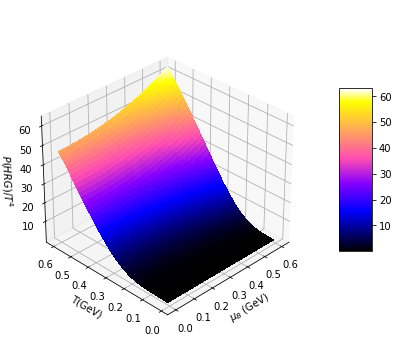

In [99]:
import os
bessel = {'besselk':kv}
libraries = [bessel, 'numpy']
mub=Symbol('mub')
muq=Symbol('muq')
mus=Symbol('mus')
T=Symbol('T')
P=Symbol('P')
k=Symbol('k')
d=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/check_eosmub/particle_data.csv')
pi=np.pi
lines=[]
lines.append(d.columns[0].split())
for i in range(len(d)):
  lines.append(d['Name\t       Mass\t   Gamma\t    Spin    Isospin  I3      B\t\tstrange\t\tcharge'][i].split())
k , v= lines[0],lines[1:]
dict={k:v for k,v in zip(k,zip(*v))}
def whichtype(x):
  if (x-int(x)) !=0:
    return -1
  else:
    return 1
l=len(d)
P=0
for i in range(l):
  mass=float(dict['Mass'][i])
  spin=float(dict['Spin'][i])
  mui=mub*float(dict['B'][i])+muq*float(dict['charge'][i])+mus*float(dict['strange'][i])
  if mass < 0.20:
    for k in range(1,4):
      z=k*mass/T
      P=P+((whichtype(spin))**(k+1))*(1/k**2)*((2.*spin+1.)/(2.*pi**2))*(mass**2)*(T**2)*exp(k*mui/T)*(besselk(2,z))
  elif mass >0.20 and mass <0.50:
    for k in range(1,3):
      z=k*mass/T
      P=P+(whichtype(spin)**(k+1))*(1/k**2)*((2.*spin+1.)/(2.*pi**2))*(mass**2)*(T**2)*exp(k*mui/T)*(besselk(2,z))
  elif mass >= 0.50 and mass <= 5.00:
    k=1
    z=k*mass/T
    P=P+(whichtype(spin)**(k+1))*(1/k**2)*((2.*spin+1.)/(2.*pi**2))*(mass**2)*(T**2)*exp(k*mui/T)*(besselk(2,z))
#print(P)
Pf1=lambdify(((mub,muq,mus,T),), P, modules=libraries)

xn = np.linspace(0.0, 0.6, num=100, endpoint=True)
yn = np.linspace(0.01, 0.6, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
  m=[]
  for j in range(len(yn)):
    m.append(Pf1((xn[i],0.,0.,yn[j]))/yn[j]**4)

  p.append(m)
xn, yn = np.meshgrid(xn, yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 0.8, 1]))
ax.set_ylabel('T(GeV)')
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel('$P(HRG)/T^4$',rotation=0)
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

\begin{eqnarray}
\frac{P}{T^4} &=& \frac{1}{2}[1- f(T,\mu_J)] \frac{P_{\mathrm{had}}(T,\mu_J)}{T^4} \nonumber \\
&+& \frac{1}{2}[1+ f(T,\mu_J)] \frac{P_{\mathrm{lat}}(T_s,\mu_J)}{T_s^4} 
\end{eqnarray}

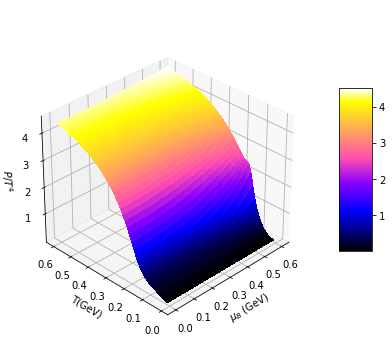

In [0]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.special import kv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
from sympy import besselk
from sympy import lambdify
from sympy import exp,besselk,expand_func 
from scipy.interpolate import interp1d

mub=Symbol('mub')
muq=Symbol('muq')
mus=Symbol('mus')
T=Symbol('T')

bessel = {'besselk':kv}
libraries = [bessel, 'numpy']
def hrg(mub,muq,mus,T):
  d=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/particle_data.csv')
  pi=np.pi
  lines=[]
  lines.append(d.columns[0].split())
  for i in range(len(d)):
    lines.append(d['Name\t       Mass\t   Gamma\t    Spin    Isospin  I3      B\t\tstrange\t\tcharge'][i].split())
  k , v= lines[0],lines[1:]
  dict={k:v for k,v in zip(k,zip(*v))}
  def whichtype(x):
    if (x-int(x)) !=0:
      return -1
    else:
      return 1
  l=len(d)
  P=0
  for i in range(l):
    mass=float(dict['Mass'][i])
    spin=float(dict['Spin'][i])
    mui=mub*float(dict['B'][i])+muq*float(dict['charge'][i])+mus*float(dict['strange'][i])
    if mass < 0.20:
      for k in range(1,4):
        z=k*mass/T
        P=P+((whichtype(spin))**(k+1))*(1/k**2)*((2.*spin+1.)/(2.*pi**2))*(mass**2)*(T**2)*exp(k*mui/T)*(besselk(2,z))
    elif mass >0.20 and mass <0.50:
      for k in range(1,3):
        z=k*mass/T
        P=P+(whichtype(spin)**(k+1))*(1/k**2)*((2.*spin+1.)/(2.*pi**2))*(mass**2)*(T**2)*exp(k*mui/T)*(besselk(2,z))
    elif mass >= 0.50 and mass <= 5.00:
      k=1
      z=k*mass/T
      P=P+(whichtype(spin)**(k+1))*(1/k**2)*((2.*spin+1.)/(2.*pi**2))*(mass**2)*(T**2)*exp(k*mui/T)*(besselk(2,z))
  return P
def qgp(mub,muq,mus,T):

  df1=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/table1.dat')
  df2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/table2.dat')
  df3=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/table3.dat')
  df4=pd.read_csv('/content/drive/My Drive/Colab Notebooks/derivative/table4.dat')
  P=0
  def tanh(a):
    return ((exp(a)-exp(-a))/(exp(a)+exp(-a)))
  def g1p(i):
    return (1./2.)*(1+tanh((T-df2[' T_1 (GeV)'][i])/df2[' Delta T_1 (GeV) '][i]))
  def g2p(i):
    return (1./2.)*(1+tanh((T-df2[' T_2 (GeV) '][i])/df2[' Delta T_2 (GeV) '][i]))
  def g2m(i):
    return (1./2.)*(1-tanh((T-df2[' T_2 (GeV) '][i])/df2[' Delta T_2 (GeV) '][i]))
  def g3p(i):
    return (1./2.)*(1+tanh((T-df1[' T_3 (GeV) '][i])/df1[' Delta T_3 (GeV) '][i]))
  def g3m(i):
    return (1./2.)*(1-tanh((T-df1[' T_3 (GeV) '][i])/df1[' Delta T_3 (GeV) '][i]))
  def g4p(i):
    return (1./2.)*(1+tanh((T-df3[' T_4 (GeV)'][i])/df3[' Delta T_4 (GeV) '][i]))
  def g5p(i):
    return (1./2.)*(1+tanh((T-df3[' T_5 (GeV)  '][i])/df4[' Delta T_5 (GeV) '][i]))
  def g5m(i):
    return (1./2.)*(1-tanh((T-df3[' T_5 (GeV)  '][i])/df4[' Delta T_5 (GeV) '][i]))
  def g6p(i):
    return (1./2.)*(1+tanh((T-df4[' T_6 (GeV) '][i])/df4[' Delta T_6 (GeV) '][i]))
  def g6m(i):
    return (1./2.)*(1-tanh((T-df4[' T_6 (GeV) '][i])/df4[' Delta T_6 (GeV) '][i]))
  def g7p(i):
    return (1./2.)*(1+tanh((T-df4[' T_7 (GeV) '][i])/df4[' Delta T_7 (GeV) '][i]))    
  def g7m(i):
    return (1./2.)*(1-tanh((T-df4[' T_7 (GeV) '][i])/df4[' Delta T_7 (GeV) '][i]))
  def g8m(i):
    return (1./2.)*(1-tanh((T-df4[' T_8 (GeV) '][i])/df4[' Delta T_8 (GeV)  '][i]))    

  chi2B = df2[' h_0 '][0]*(1-df2[' h_1 (GeV^2) '][0]/T**2)*g1p(0)*g2p(0)+df2[' h_2 (GeV^-n) '][0]*(T**df2[' n  '][0])*g2m(0)
  chi4B= (df1[' h_3 '][0]+df1[' h_4 (GeV)'][0]/T+df1[' h_5 (GeV^2)'][0]/T**2)*g3p(0)+df1[' h_6 '][0]*chi2B*g3m(0)  
  chi6B=df3[' h_7 '][0]*g4p(0)*g5m(0)*g6m(0)*g7m(0)+df3[' h_8 '][0]*g4p(0)*g5p(0)*g6m(0)*g7m(0)+df3[' h_9 '][0]*g4p(0)*g5p(0)*g6p(0)*g7m(0)
  chi11BQ=df2[' h_0 '][3]*(1-df2[' h_1 (GeV^2) '][3]/T**2)*g1p(3)*g2p(3)+df2[' h_2 (GeV^-n) '][3]*(T**df2[' n  '][3])*g2m(3)
  chi11BS=df2[' h_0 '][4]*(1-df2[' h_1 (GeV^2) '][4]/T**2)*g1p(4)*g2p(4)+df2[' h_2 (GeV^-n) '][4]*(T**df2[' n  '][4])*g2m(4)
  chi31BQ= (df1[' h_3 '][3]+df1[' h_4 (GeV)'][3]/T+df1[' h_5 (GeV^2)'][3]/T**2)*g3p(3)+df1[' h_6 '][3]*chi11BQ*g3m(3)  
  chi31BS= (df1[' h_3 '][6]+df1[' h_4 (GeV)'][6]/T+df1[' h_5 (GeV^2)'][6]/T**2)*g3p(6)+df1[' h_6 '][6]*chi11BS*g3m(6)  
  chi51BQ=df3[' h_7 '][1]*g4p(1)*g5m(1)*g6m(1)*g7m(1)*g8m(1)+df3[' h_8 '][1]*g4p(1)*g5p(1)*g6m(1)*g7m(1)*g8m(1)+df3[' h_9 '][1]*g4p(1)*g5p(1)*g6p(1)*g7m(1)*g8m(1)+df3[' h_10 '][1]*g4p(1)*g5p(1)*g6p(1)*g7p(1)*g8m(1)
  chi51BS=df3[' h_7 '][2]*g4p(2)*g5p(2)*g6m(2)*g7m(2)*g8m(2)+df3[' h_8 '][2]*g4p(2)*g5p(2)*g6p(2)*g7m(2)*g8m(2)+df3[' h_9 '][2]*g4p(2)*g5p(2)*g6p(2)*g7p(2)*g8m(2)
  
  def lat0mub(T):
    T=Symbol('T')
    Tc=0.160
    tbar=T/Tc
    ct=3.8706
    an=-8.7704
    bn=3.9200
    cn=0.0000
    dn=0.3419   
    t0=0.9761
    ad=-1.2600
    bd=0.8425
    cd=0.0000
    dd=-0.0475
    pid=95.*(np.pi)**2/180.
    P0=T**4*(0.5+0.5*tanh(ct*(tbar-t0)))*(pid+an/tbar+bn/tbar**2+cn/tbar**3+dn/tbar**4)/(1+ad/tbar+bd/tbar**2+cd/tbar**3+dd/tbar**4)
    return P0

  P=lat0mub(T)+T**4*((chi2B/2)*((mub/T)**2)+chi11BQ*(mub/T)*(muq/T)+chi11BS*(mub/T)*(mus/T)+(chi31BQ/6)*((mub/T)**3)*(muq/T)+(chi31BS/6)*((mub/T)**3)*(mus/T)+(chi4B/24)*((mub/T)**4)+(chi51BQ/120)*((mub/T)**5)*(muq/T)+(chi51BS/120)*((mub/T)**5)*(mus/T)+(chi6B/720)*(mub/T)**6)
  return P


def funct(mub,T):
  def tanh(a):
    return ((exp(a)-exp(-a))/(exp(a)+exp(-a)))
  DeltaTc=0.1*(0.160)
  arg=(T-(0.160-0.4*0.139*(mub**2)-0.4*0.053*(mub**4)))/DeltaTc
  f4=tanh(arg)
  return f4
P=0.5*hrg(mub,muq,mus,T)-0.5*funct(mub,T)*hrg(mub,muq,mus,T)+0.5*qgp(mub,muq,mus,T)+ 0.5*funct(mub,T)*qgp(mub,muq,mus,T)
Pf1=lambdify(((mub,muq,mus,T),), P, modules=libraries)

xn = np.linspace(0.0, 0.6, num=100, endpoint=True)
yn = np.linspace(0.01, 0.6, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
  m=[]
  for j in range(len(yn)):
    m.append(Pf1((xn[i],0.,0.,yn[j]))/yn[j]**4)

  p.append(m)
xn, yn = np.meshgrid(xn, yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 0.8, 1]))
ax.set_ylabel('T(GeV)')
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel('$P/T^4$',rotation=0)
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

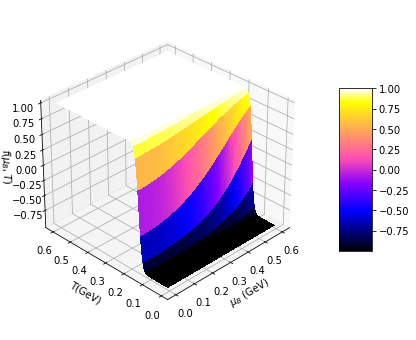

In [0]:
def funct(mub,T):
  def tanh(a):
    return ((exp(a)-exp(-a))/(exp(a)+exp(-a)))
  DeltaTc=0.1*(0.160)
  arg=(T-(0.160-0.4*0.139*(mub**2)-0.4*0.053*(mub**4)))/DeltaTc
  f4=tanh(arg)
  return f4
functl=lambdify(((mub,T),),funct(mub,T), modules=libraries)
xn = np.linspace(0.0, 0.6, num=100, endpoint=True)
yn = np.linspace(0.01, 0.6, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
  m=[]
  for j in range(len(yn)):
    m.append(functl((xn[i],yn[j])))
  p.append(m)
xn, yn = np.meshgrid(xn, yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1.0, 1.0, 0.8, 1]))
ax.set_ylabel('T(GeV)')
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel('$f(\mu_B,T)$',rotation=0)
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

\begin{eqnarray}
s &=& \left. \frac{\partial P}{\partial T} \right|_{\mu_{J}}, \\
n_{J} &=& \left. \frac{\partial P}{\partial \mu_J} \right|_{T, \mu_K}, \\
e &=& Ts - P + \sum_J \mu_J n_J, \\ 
\end{eqnarray}
respectively, using the standard thermodynamic relations. Here $\{J,K\} = B,Q,S$ and $J\neq K$.

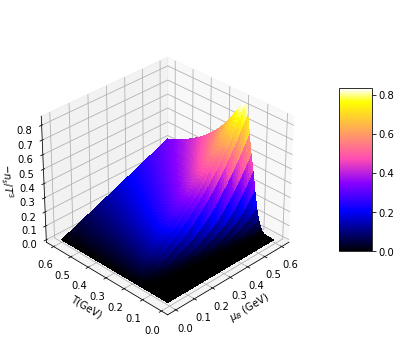

In [0]:
partial=Derivative(P,mus)
ns=partial.doit()
nsf=lambdify(((mub,muq,mus,T),), ns, modules=libraries)
xn = np.linspace(0.0, 0.6, num=100, endpoint=True)
yn = np.linspace(0.01, 0.6, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
  m=[]
  for j in range(len(yn)):
    m.append(-(nsf((xn[i],0.,0.,yn[j]))/yn[j]**3))
  p.append(m)
xn, yn = np.meshgrid(xn, yn)
#print(xn,yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.set_ylabel('T(GeV)')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.8, 1]))
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel(r'$- n_{s}/T^3$')
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

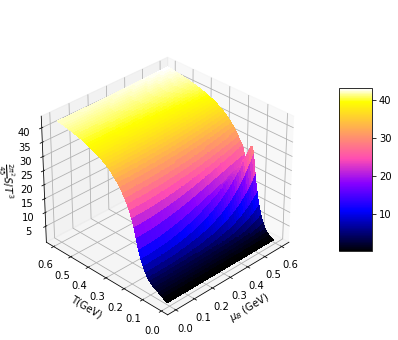

In [0]:
partial=Derivative(P,T)
sen=partial.doit()
pi=np.pi

sen=lambdify(((mub,muq,mus,T),), sen, modules=libraries)
xn = np.linspace(0.0, 0.6, num=100, endpoint=True)
yn = np.linspace(0.01, 0.6, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
  m=[]
  for j in range(len(yn)):
    m.append(45./(2.*(pi)**2)*((1/yn[j]**3)*sen((xn[i],0.,0.,yn[j]))))
  p.append(m)
xn, yn = np.meshgrid(xn, yn)
#print(xn,yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.set_ylabel('T(GeV)')
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel(r'$\frac{2\pi^2}{45}S/T^3$')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.8, 1]))
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

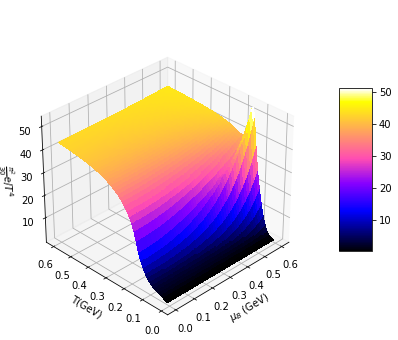

In [0]:
partial=Derivative(P,mub)
nb=partial.doit()
partial=Derivative(P,muq)
nq=partial.doit()
partial=Derivative(P,mus)
ns=partial.doit()
partial=Derivative(P,T)
sen=partial.doit()

en=T*sen-P+mub*nb+muq*nq+mus*ns
en=lambdify(((mub,muq,mus,T),), en, modules=libraries)

xn = np.linspace(0.0, 0.6, num=100, endpoint=True)
yn = np.linspace(0.01, 0.6, num=100, endpoint=True)
p=[]
for i in range(len(xn)):
  m=[]
  for j in range(len(yn)):
    m.append(30./((pi)**2)*((1/yn[j]**4)*en((xn[i],0.,0.,yn[j]))))
  p.append(m)
xn, yn = np.meshgrid(xn, yn)
#print(xn,yn)
fig = plt.figure(figsize=(7,6))
ax = fig.gca(projection='3d')
ax.set_ylabel('T(GeV)')
ax.set_xlabel(r'$\mu_B$ (GeV)')
ax.set_zlabel(r'$\frac{\pi^2}{30}e/T^4$')
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([1, 1, 0.8, 1]))
ax.view_init(azim=-135)
surf=ax.plot_surface(xn, yn, np.transpose(np.array(p)), cmap=cm.gnuplot2, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)